Matplotlib отличный инструмент, но он имеет ряд недостатков. Существует другой пакет [Seaborn](http://seaborn.pydata.org/) `Seaborn` предоставляет API поверх Matplotlib, которые предлагает различные высокоуровневые функции, а также интегрирует функциональность `DataFrame` из Pandas.

# Seaborn vs Matplotlib

Рассмотрим пример простого графика случайных данных в Matplotlib, используя классический подход для форматирования и цветов. Мы начнем с импорта библиотек:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Теперь создадим случайные данные:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

И создадим простой график:

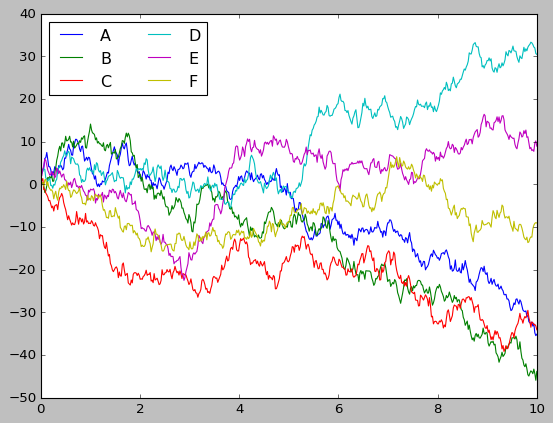

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Хотя график представляет все данные, которые нам нужно, он не является достаточно приятным взгляду и эстетичным и выглядит устаревшим.

Теперь давайте попробуем Seaborn. Мы увидим, что этот пакет имеет свой интерфейс, но также перегружает некоторые параметры Matplotlib и превращает график в намного более привлекательный. Стиль устанавливается вызовом метода  `set()` из пакета Seaborn, по традиции Seaborn импортируется как `sns`:

In [4]:
import seaborn as sns
sns.set()

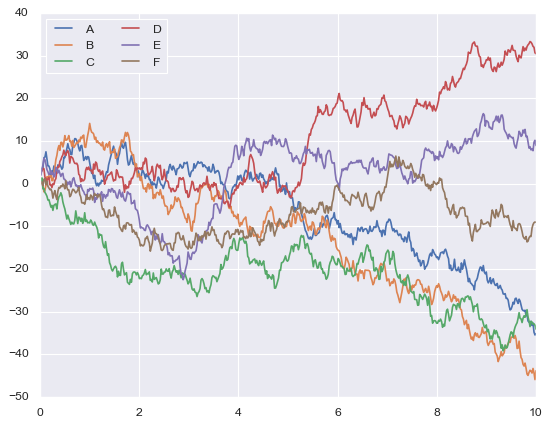

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

# Изучаем графики Seaborn

Главная идея Seaborn в том, что этот покет предлагает высокоуровневые команды для создания различных типов графиков, полезных для статистического исследования данных, а также для статистического моделирования.
Давайте посмотрим на некоторые наборы данных и типы графиков доступные в Seaborn.
Обратите внимание, что все нижеследующие может быть выполнено с помощью команд Matplotlib (в действительности Seaborn выполняет именно эти команды "под капотом"), но API у Seaborn намного более удобный:

## Гистограммы, KDE и плотности

Иногда всё что вам нужно - это построить гистограммы и объединенные распределения переменных. Это было достаточно просто в Matplotlib:

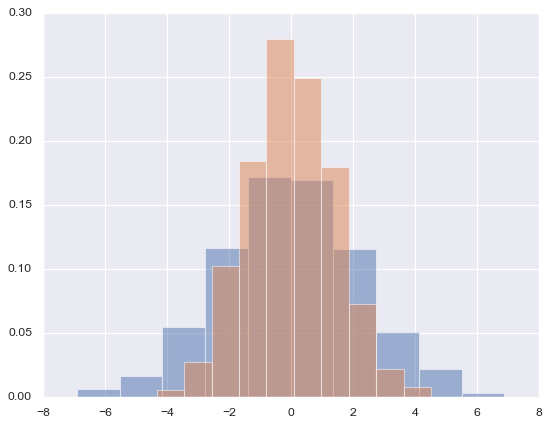

In [9]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Вместо гистограммы мы можем получить гладкую оценку распределения, используя ядерную оценку плотности распределения, которую Seaborn выполняет с помощью `sns.kdeplot`:

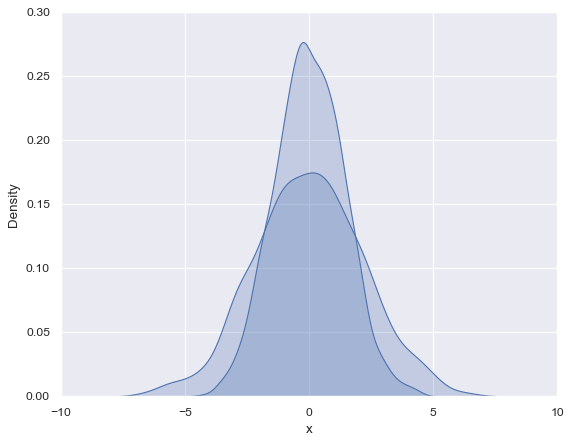

In [11]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Гистограммы и ядерная оценка плотности может быть объединена с использованием `distplot`:

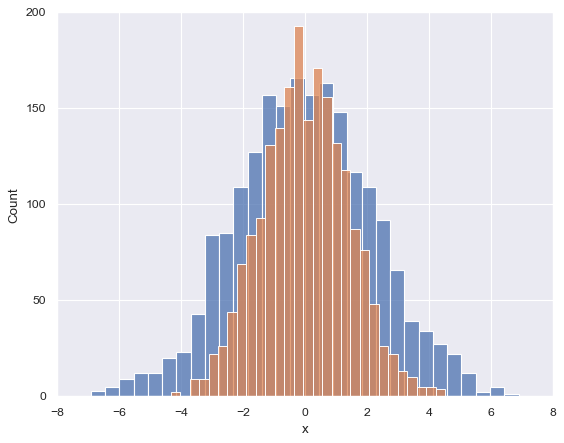

In [22]:
sns.histplot(data['x'])
sns.histplot(data['y']);

Если передать двумерный набор данных, то мы получим двумерную визуализацию:

<Axes: ylabel='Density'>

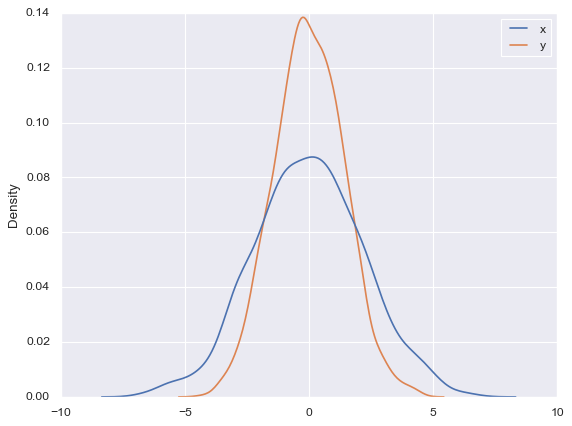

In [24]:
# что-то совсем не так как в книге
sns.kdeplot(data)

Мы можем посмотреть на совместное распределение и частное распределения вместе используя функцию `sns.jointplot`:

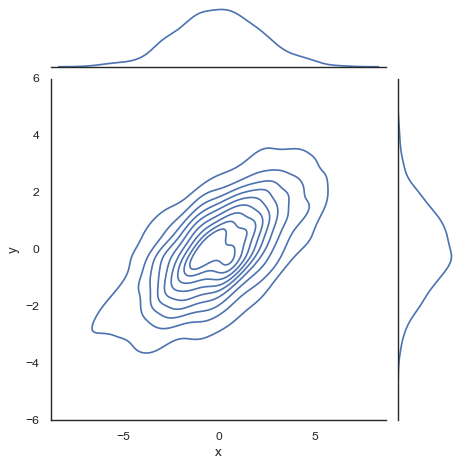

In [27]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind='kde');

Мы также можем создать гексагональную диаграмму:

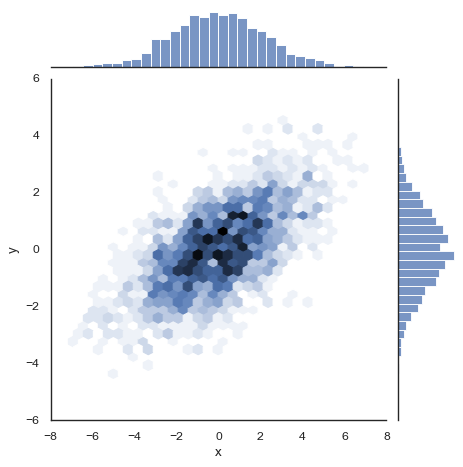

In [31]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind='hex')

## Парные графики

Иногда, для больших наборов данных, очень удобно использовать парные графики:

In [32]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Визуализация многомерных отношений между данными может быть настолько просто как:

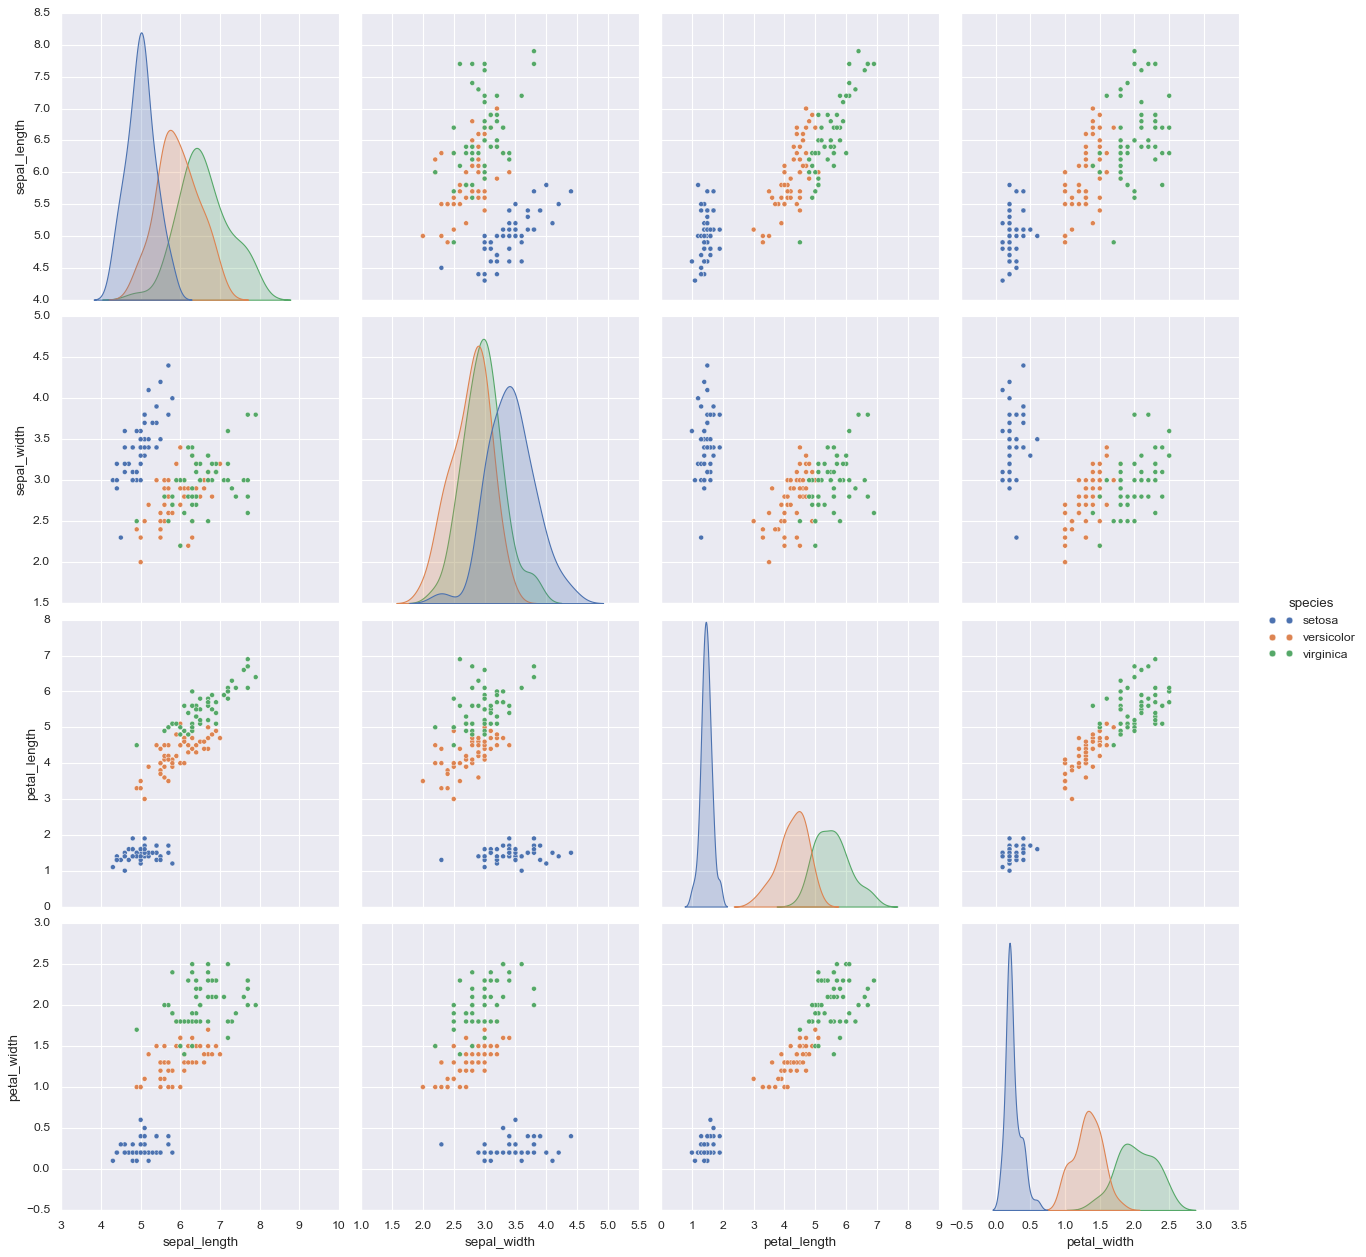

In [36]:
sns.pairplot(iris, hue='species', height=4)

## Фасетные диаграммы

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html#Faceted-histograms